In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn import metrics

In [2]:
dataset=pd.read_csv("car_evaluation.csv")

In [6]:
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
dataset.columns=(['buy_price','maintain_cost','door','persons','luggage_boot','safety','decision'])

In [9]:
dataset.to_csv('cardataset.csv')

In [10]:
dataset=pd.read_csv("cardataset.csv")

In [11]:
data1=dataset
data1.head()

,Unnamed: 0,buy_price,maintain_cost,door,persons,luggage_boot,safety,decision
0,0,vhigh,vhigh,2,2,small,med,unacc
1,1,vhigh,vhigh,2,2,small,high,unacc
2,2,vhigh,vhigh,2,2,med,low,unacc
3,3,vhigh,vhigh,2,2,med,med,unacc
4,4,vhigh,vhigh,2,2,med,high,unacc


# Converting our data into numerical values
## buy_price:
vhigh=4
high=3
med=2
low=1
## maintain_cost
vhigh=4
high=3
med=2
low=1
## luggage_boot
big=3
med=2
small=1
## safety
high=3
med=2
low=1
## door
5more=6
2=2
3=3
4=4
## persons
more=6
2=2
4=4
## decision
unacc=0
acc=1
good=2
vgood=3

In [12]:
data1['buy_price'].replace({'vhigh':4,'high':3,'med':2,'low':1}, inplace=True)
data1['maintain_cost'].replace({'vhigh':4,'high':3,'med':2,'low':1}, inplace=True)
data1['luggage_boot'].replace({'big':3,'med':2,'small':1}, inplace=True)
data1['safety'].replace({'high':3,'med':2,'low':1}, inplace=True)
data1['door'].replace({'5more':6,'2':2,'3':3,'4':4}, inplace=True)
data1['persons'].replace({'more':6,'2':2,'4':4}, inplace=True)
data1['decision'].replace({'unacc':0,'acc':1,'good':2,'vgood':3}, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     1727 non-null   int64
 1   buy_price      1727 non-null   int64
 2   maintain_cost  1727 non-null   int64
 3   door           1727 non-null   int64
 4   persons        1727 non-null   int64
 5   luggage_boot   1727 non-null   int64
 6   safety         1727 non-null   int64
 7   decision       1727 non-null   int64
dtypes: int64(8)
memory usage: 108.1 KB


In [16]:
data1=data1.drop(['Unnamed: 0'],axis=1)

In [17]:
data1.to_csv('carpreprocess.csv')

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


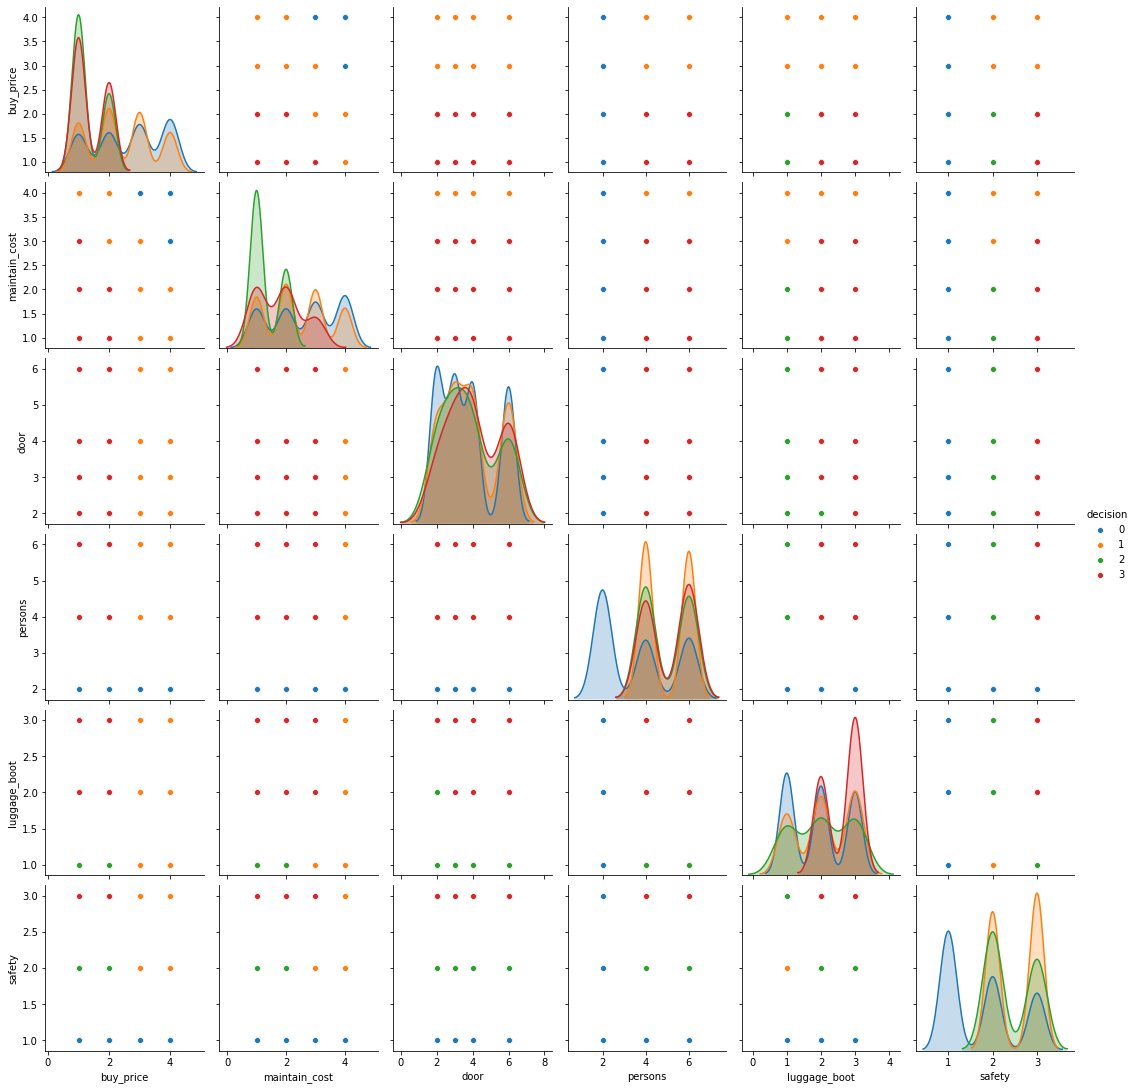

In [18]:
data2=data1
sns.pairplot(data2, hue='decision')
plt.show();

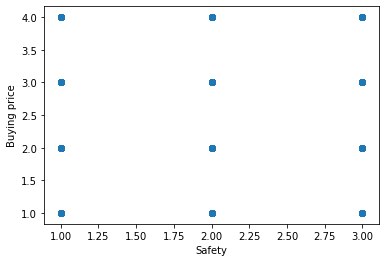

In [20]:
plt.scatter(data2['safety'],data2['buy_price'],)
plt.xlabel('Safety')
plt.ylabel('Buying price')
plt.show();

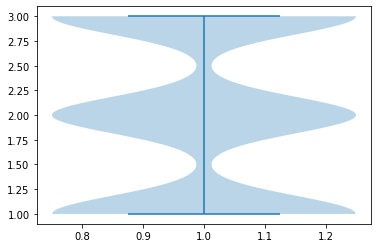

In [24]:
plt.violinplot(data2['safety'])
plt.show()

In [26]:
pd.DataFrame.corr(data2)

,buy_price,maintain_cost,door,persons,luggage_boot,safety,decision
buy_price,1.000000,-0.001043,0.000920,0.000952,0.000952,0.000952,-0.282488
maintain_cost,-0.001043,1.000000,0.000920,0.000952,0.000952,0.000952,-0.232128
door,0.000920,0.000920,1.000000,-0.000840,-0.000840,-0.000840,0.059487
persons,0.000952,0.000952,-0.000840,1.000000,-0.000869,-0.000869,0.341489
luggage_boot,0.000952,0.000952,-0.000840,-0.000869,1.000000,-0.000869,0.157617
safety,0.000952,0.000952,-0.000840,-0.000869,-0.000869,1.000000,0.439171
decision,-0.282488,-0.232128,0.059487,0.341489,0.157617,0.439171,1.000000


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'safety')]

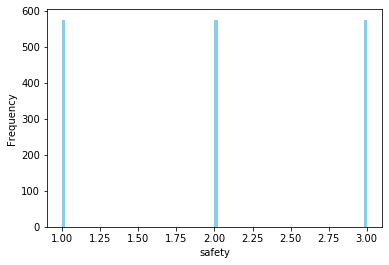

In [27]:
x = sns.distplot(data2['safety'],
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
x.set(xlabel='safety', ylabel='Frequency')